<!-- Tala Vahedi
October 30, 2021
Week Ten Assignment

Script Purpose: Perform the Scikit-Learn Tutorial
Script Version: 1.0 
Script Author:  Tala Vahedi, University of Arizona

Script Revision History:
Version 1.0 Oct 30, 2021, Python 3.x

Using the Scikit-Learn Tutorial found here:  https://www.dataquest.io/blog/sci-kit-learn-tutorial/ 
Perform the operations from the beginning of the Tutorial stopping when you get to the Building the 
Model Section.

Create a Report that captures each major steps of the process and provide a short write up of what 
you learned during that step and what areas are you still confused about.
 -->

In [108]:
# Script Purpose: Using Scikit-Learn Nearest Neighbor in Python
# Script Version: 1.0 
# Script Author:  Tala Vahedi

# Script Revision History:
# Version 1.0 Nov 13, 2021, Python 3.x

# Psuedo Constants
SCRIPT_NAME    = "Script: Using Scikit-Learn Nearest Neighbor in Python"
SCRIPT_VERSION = "Version 1.0"
SCRIPT_AUTHOR  = "Author: Tala Vahedi"

# Python Standard Library
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [109]:
# Print Basic Script Information
print()
print(SCRIPT_NAME)
print(SCRIPT_VERSION)
print(SCRIPT_AUTHOR)
print()  


Script: Using Scikit-Learn Nearest Neighbor in Python
Version 1.0
Author: Tala Vahedi



In [110]:
# Read in the data with `read_csv()`
data = pd.read_csv("spamOrHam.csv", dtype=str)

# Using .head() method to view the first few records of the data set
data.head()

,email,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [111]:
# using the dtypes() method to display the different datatypes available
data.dtypes

email    object
label    object
dtype: object

In [112]:
# preprocess data: make lower case
data = data.apply(lambda x: x.astype(str).str.lower())
data.head()

,email,label
0,"subject: what up , , your cam babe what are yo...",spam
1,subject: want to make more money ? order confi...,spam
2,subject: food for thoughts [ join now - take a...,spam
3,subject: your pharmacy ta would you want cheap...,spam
4,subject: bigger breast just from a pill image ...,spam


In [113]:
# preprocess data: remove non ascii characters and special characters
data.email.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
data["email"]= data['email'].map(lambda x: re.sub(r'\W+', ' ', x))
data.head()

,email,label
0,subject what up your cam babe what are you loo...,spam
1,subject want to make more money order confirma...,spam
2,subject food for thoughts join now take a free...,spam
3,subject your pharmacy ta would you want cheap ...,spam
4,subject bigger breast just from a pill image i...,spam


In [114]:
# preprocess data: remove stop words
with open("STOP_WORDS.txt", 'r') as stopWordList:
    stopWords = stopWordList.read()
STOP_WORDS = stopWords.split()

data['email'] = data['email'].apply(lambda x: ' '.join([item for item in x.split() if item not in STOP_WORDS]))

data.head()

,email,label
0,subject cam babe companion friendship love goo...,spam
1,subject money order confirmation order shipped...,spam
2,subject food thoughts join now free tour click...,spam
3,subject pharmacy ta cheap perscriptions http w...,spam
4,subject bigger breast pill image loading cli k...,spam


In [96]:
data["numOfWords"] = data['email'].apply(lambda x: len(str(x).split(' ')))
data.head()

,email,label,numOfWords
0,subject cam babe companion friendship love goo...,spam,74
1,subject money order confirmation order shipped...,spam,32
2,subject food thoughts join now free tour click...,spam,9
3,subject pharmacy ta cheap perscriptions http w...,spam,9
4,subject bigger breast pill image loading cli k...,spam,26


In [97]:
# count the number of websites in email
data['numOfURLs'] = data['email'].str.count('http')
data.head()

,email,label,numOfWords,numOfURLs
0,subject cam babe companion friendship love goo...,spam,74,2
1,subject money order confirmation order shipped...,spam,32,0
2,subject food thoughts join now free tour click...,spam,9,0
3,subject pharmacy ta cheap perscriptions http w...,spam,9,1
4,subject bigger breast pill image loading cli k...,spam,26,0


In [115]:
# count the number of times email initiated a spam (e.g., download, buy, etc.)
data['numOfSpamAttempts'] = data['email'].str.count('buy|money|free|click|cheap|price|download|install')
data.head()

,email,label,numOfSpamAttempts
0,subject cam babe companion friendship love goo...,spam,0
1,subject money order confirmation order shipped...,spam,1
2,subject food thoughts join now free tour click...,spam,2
3,subject pharmacy ta cheap perscriptions http w...,spam,1
4,subject bigger breast pill image loading cli k...,spam,0


In [99]:
# count how many replies and forwarded emails there are
data['numOfReplies'] = data['email'].str.count(' re :|')
data['numOfFWs'] = data['email'].str.count(' fw |- - - - - original message - - - - -')

# how many emails were sent from a device (e.g., from iPhone, blackberry, etc)
data.head()

,email,label,numOfWords,numOfURLs,numOfSpamAttempts,numOfReplies,numOfFWs
0,subject cam babe companion friendship love goo...,spam,74,2,0,495,0
1,subject money order confirmation order shipped...,spam,32,0,1,238,0
2,subject food thoughts join now free tour click...,spam,9,0,2,55,0
3,subject pharmacy ta cheap perscriptions http w...,spam,9,1,1,59,0
4,subject bigger breast pill image loading cli k...,spam,26,0,0,173,0


In [116]:
# how many emails were sent from a device (e.g., from iPhone, blackberry, etc)
data['numOfDeviceEmails'] = data['email'].str.count('sent from my')
data.head()

,email,label,numOfSpamAttempts,numOfDeviceEmails
0,subject cam babe companion friendship love goo...,spam,0,0
1,subject money order confirmation order shipped...,spam,1,0
2,subject food thoughts join now free tour click...,spam,2,0
3,subject pharmacy ta cheap perscriptions http w...,spam,1,0
4,subject bigger breast pill image loading cli k...,spam,0,0


In [117]:
# grabbing unique instances
print("email : ", data['email'].unique())
print("sentiment : ", data['label'].unique())
# print("numOfWords : ", data['numOfWords'].unique())
print("numOfSpamAttempts : ", data['numOfSpamAttempts'].unique())
# print("numOfFWs : ", data['numOfFWs'].unique())
# print("numOfReplies : ", data['numOfReplies'].unique())
print("numOfDeviceEmails : ", data['numOfDeviceEmails'].unique())

email :  ['subject cam babe companion friendship love good ole fashioned try brand new site developed created help find re quick bio form re road satisfaction sense word matter may try youll amazed terrific time evening copy pa ste add ress browser site http www meganbang biz bld acc plz http www naturalgolden com retract counterattack aitken step preemptive shoehorn scaup electrocardiograph movie honeycomb monster war brandywine pietism byrne catatonia encomia lookup intervenor skeleton turn catfish'
 'subject money order confirmation order shipped january via fedex federal express tracking number random word registering userid random word learn fortune ebay complete turnkey system software videos turorials clck receive future mailings'
 'subject food thoughts join now free tour click removed' ...
 'subject save thousands m e d s help get m e d s cheap 9 zv 25 slb 6277 g 952487 d elephant sideways onright 73724926'
 'subject go timed aaron offload misplaces shoved withstanding breveti

In [118]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
data['email'] = le.fit_transform(data['email'])
data['label'] = le.fit_transform(data['label'])
#display the initial records
data.head()

,email,label,numOfSpamAttempts,numOfDeviceEmails
0,1940,1,0,0
1,9423,1,1,0
2,5107,1,2,0
3,10953,1,1,0
4,1464,1,0,0


In [119]:
#assigning the target variable
target = data['label']
data.head(10)

,email,label,numOfSpamAttempts,numOfDeviceEmails
0,1940,1,0,0
1,9423,1,1,0
2,5107,1,2,0
3,10953,1,1,0
4,1464,1,0,0
5,2049,1,0,0
6,8799,1,0,0
7,11597,1,5,0
8,560,1,0,0
9,14969,1,1,0


In [126]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.15, random_state = 10)

In [127]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8485981308411215


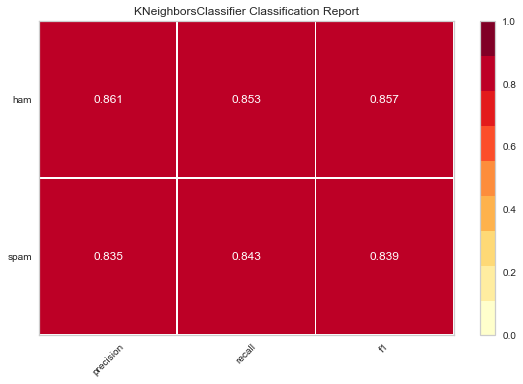

In [128]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['spam','ham'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [129]:
data_test["predLabel"] = neigh.predict(data_test)
data_test.head(10)

,email,label,numOfSpamAttempts,numOfDeviceEmails,predLabel
4027,9426,1,1,0,1
9396,6720,0,0,0,1
14075,6565,1,0,0,1
11168,8675,1,2,0,1
11757,7504,1,0,0,1
13729,14448,1,1,0,1
13254,15588,0,0,0,0
3402,63,0,0,0,1
14114,1708,1,1,0,1
13222,9035,0,0,0,0
